b=1 km/s: Nd = 8.64e+15 cm^-2
b=2 km/s: Nd = 3.89e+16 cm^-2
b=5 km/s: Nd = 2.78e+17 cm^-2
b=10 km/s: Nd = 1.22e+18 cm^-2
b=20 km/s: Nd = 5.31e+18 cm^-2
b=30 km/s: Nd = 1.25e+19 cm^-2
b=40 km/s: Nd = 2.30e+19 cm^-2
b=50 km/s: Nd = 3.68e+19 cm^-2


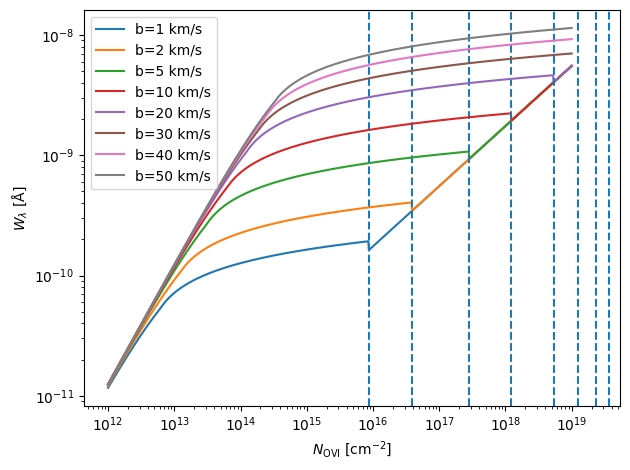

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- atomic constants for O VI 1031 ----------
lam = 1031.926e-8             # cm
fosc = 0.1329
gamma = 2.16e8                # s^-1

# physical constants (cgs)
c   = 2.99792458e10
me  = 9.10938356e-28
e   = 4.8032068e-10
sqrt_pi = np.sqrt(np.pi)

# helper: tau_0 at line centre
def tau0(N, b):
    return sqrt_pi * (e**2/(me*c)) * N * fosc * lam / b

# helper: tau_damp boundary (Eq. 9.25)
def tau_damp(b):
    arg = 4*sqrt_pi*np.log(2)**0.5 * b /(gamma*lam)
    return 4*sqrt_pi * b/(gamma*lam) * np.log(arg)

# piece-wise W/λ using Draine’s formulas (Eqs 9.12, 9.17, 9.22)
def W_over_lambda(N, b):
    t0 = tau0(N,b)
    if t0 <= 1.25393:
        return sqrt_pi*(b/c)*t0/(1+t0/(2*np.sqrt(2)))
    elif t0 <= tau_damp(b):
        return 2*(b/c)*np.sqrt(np.log(t0/np.log(2)))
    else:
        return (1/c)*np.sqrt( (e**2/(me*c))*N*fosc*lam**2*gamma )

# grid & plot
cols = np.logspace(12, 19, 1000)     # column density [cm^-2]
for b in [1e5,2e5,5e5,1e6, 2e6, 3e6,4e6,5e6]:           # b in cm/s
    W = np.array([W_over_lambda(N,b) for N in cols])
    plt.loglog(cols, W*lam, label=f"b={b/1e5:.0f} km/s")
    Nd = (tau_damp(b) * b)/( sqrt_pi * (e**2/(me*c))*fosc*lam )
    print(f"b={b/1e5:.0f} km/s: Nd = {Nd:.2e} cm^-2")
    plt.axvline(Nd, ls='--')

plt.xlabel(r"$N_{\mathrm{OVI}}\ \mathrm{[cm^{-2}]}$")
plt.ylabel(r"$W_\lambda\ \mathrm{[\AA]}$")
plt.legend(); plt.tight_layout(); plt.show()